# 1. Cargar Librerias 

In [1]:
# Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Analisis profundo de datos
from ydata_profiling import ProfileReport


import geopandas as gpd
import pandas as pd
import numpy as np
import pandas 
# import cv2
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import rasterio
from rasterio.plot import reshape_as_image, reshape_as_raster
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import Lasso, Ridge

# 2. Cargar Shapefile para entrenar el modelo de regresión

In [2]:
shapefile_path = r'C:\Users\USUARIO\Desktop\TESIS\Puntos_Muestreo\Ubaque\Muestreo_Ubaque_V2.shp'
gdf = gpd.read_file(shapefile_path)
gdf

,Blue,Green,Red,Red_Edge,NIR,NDWI,NDVI,Turbidez,Nitratos,Fosfatos,ID,geometry
0,1328.420,1651.760,1255.340,2253.550,3169.860,0.129543,0.055709,9.46,9.0,9.20,1,POINT Z (-73.93436 4.49932 0)
1,1110.980,1448.230,1184.630,2067.500,2842.020,0.120542,0.024954,7.23,8.8,6.20,10,POINT Z (-73.93513 4.49962 0)
2,992.203,1331.030,954.005,1954.350,2659.460,0.105161,0.029377,6.82,5.8,6.10,11,POINT Z (-73.9358 4.49955 0)
3,975.826,1288.430,945.384,1941.240,2149.080,0.084407,0.111475,5.47,5.1,6.00,12,POINT Z (-73.93651 4.49942 0)
4,938.151,1248.590,945.147,1362.800,1939.250,0.070404,0.100835,4.92,4.2,4.60,13,POINT Z (-73.93661 4.49981 0)
5,923.979,1225.220,911.826,1224.240,1883.890,0.066926,0.112049,3.38,4.2,4.50,23,POINT Z (-73.93604 4.50055 0)
6,892.135,1198.300,890.934,1192.530,1750.350,0.046654,0.082771,3.16,3.0,4.40,15,POINT Z (-73.93563 4.49986 0)
7,890.890,1184.290,889.172,1122.890,1747.110,0.044522,0.087771,3.11,2.9,4.30,16,POINT Z (-73.93504 4.49988 0)
8,886.775,1181.730,887.519,1039.150,1733.640,0.032495,0.145905,2.92,2.5,3.20,17,POINT Z (-73.9345 4.49989 0)
9,879.324,1176.040,878.396,1020.370,1655.390,0.015697,0.155319,2.83,2.4,3.00,18,POINT Z (-73.934 4.5003 0)


#### Análisis exploratorio de los datos

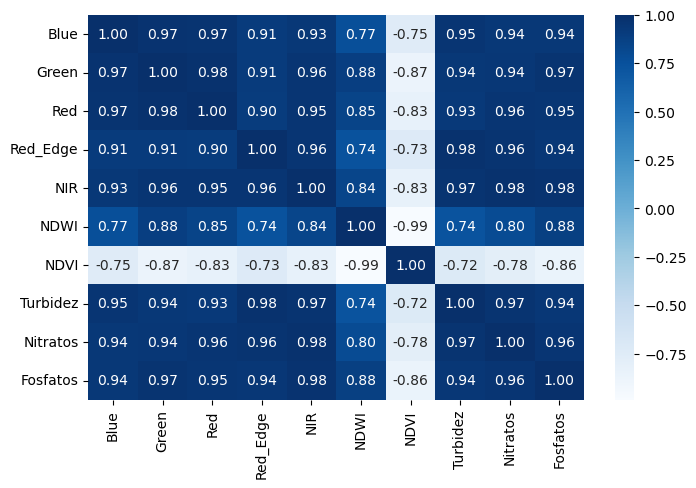

In [3]:
plt.figure(figsize=(8,5))
sns.heatmap(gdf[["Blue","Green","Red","Red_Edge","NIR","NDWI","NDVI","Turbidez","Nitratos","Fosfatos"]].corr(),
            annot=True, cmap='Blues', fmt='.2f')
plt.show()

<Figure size 2500x2000 with 0 Axes>

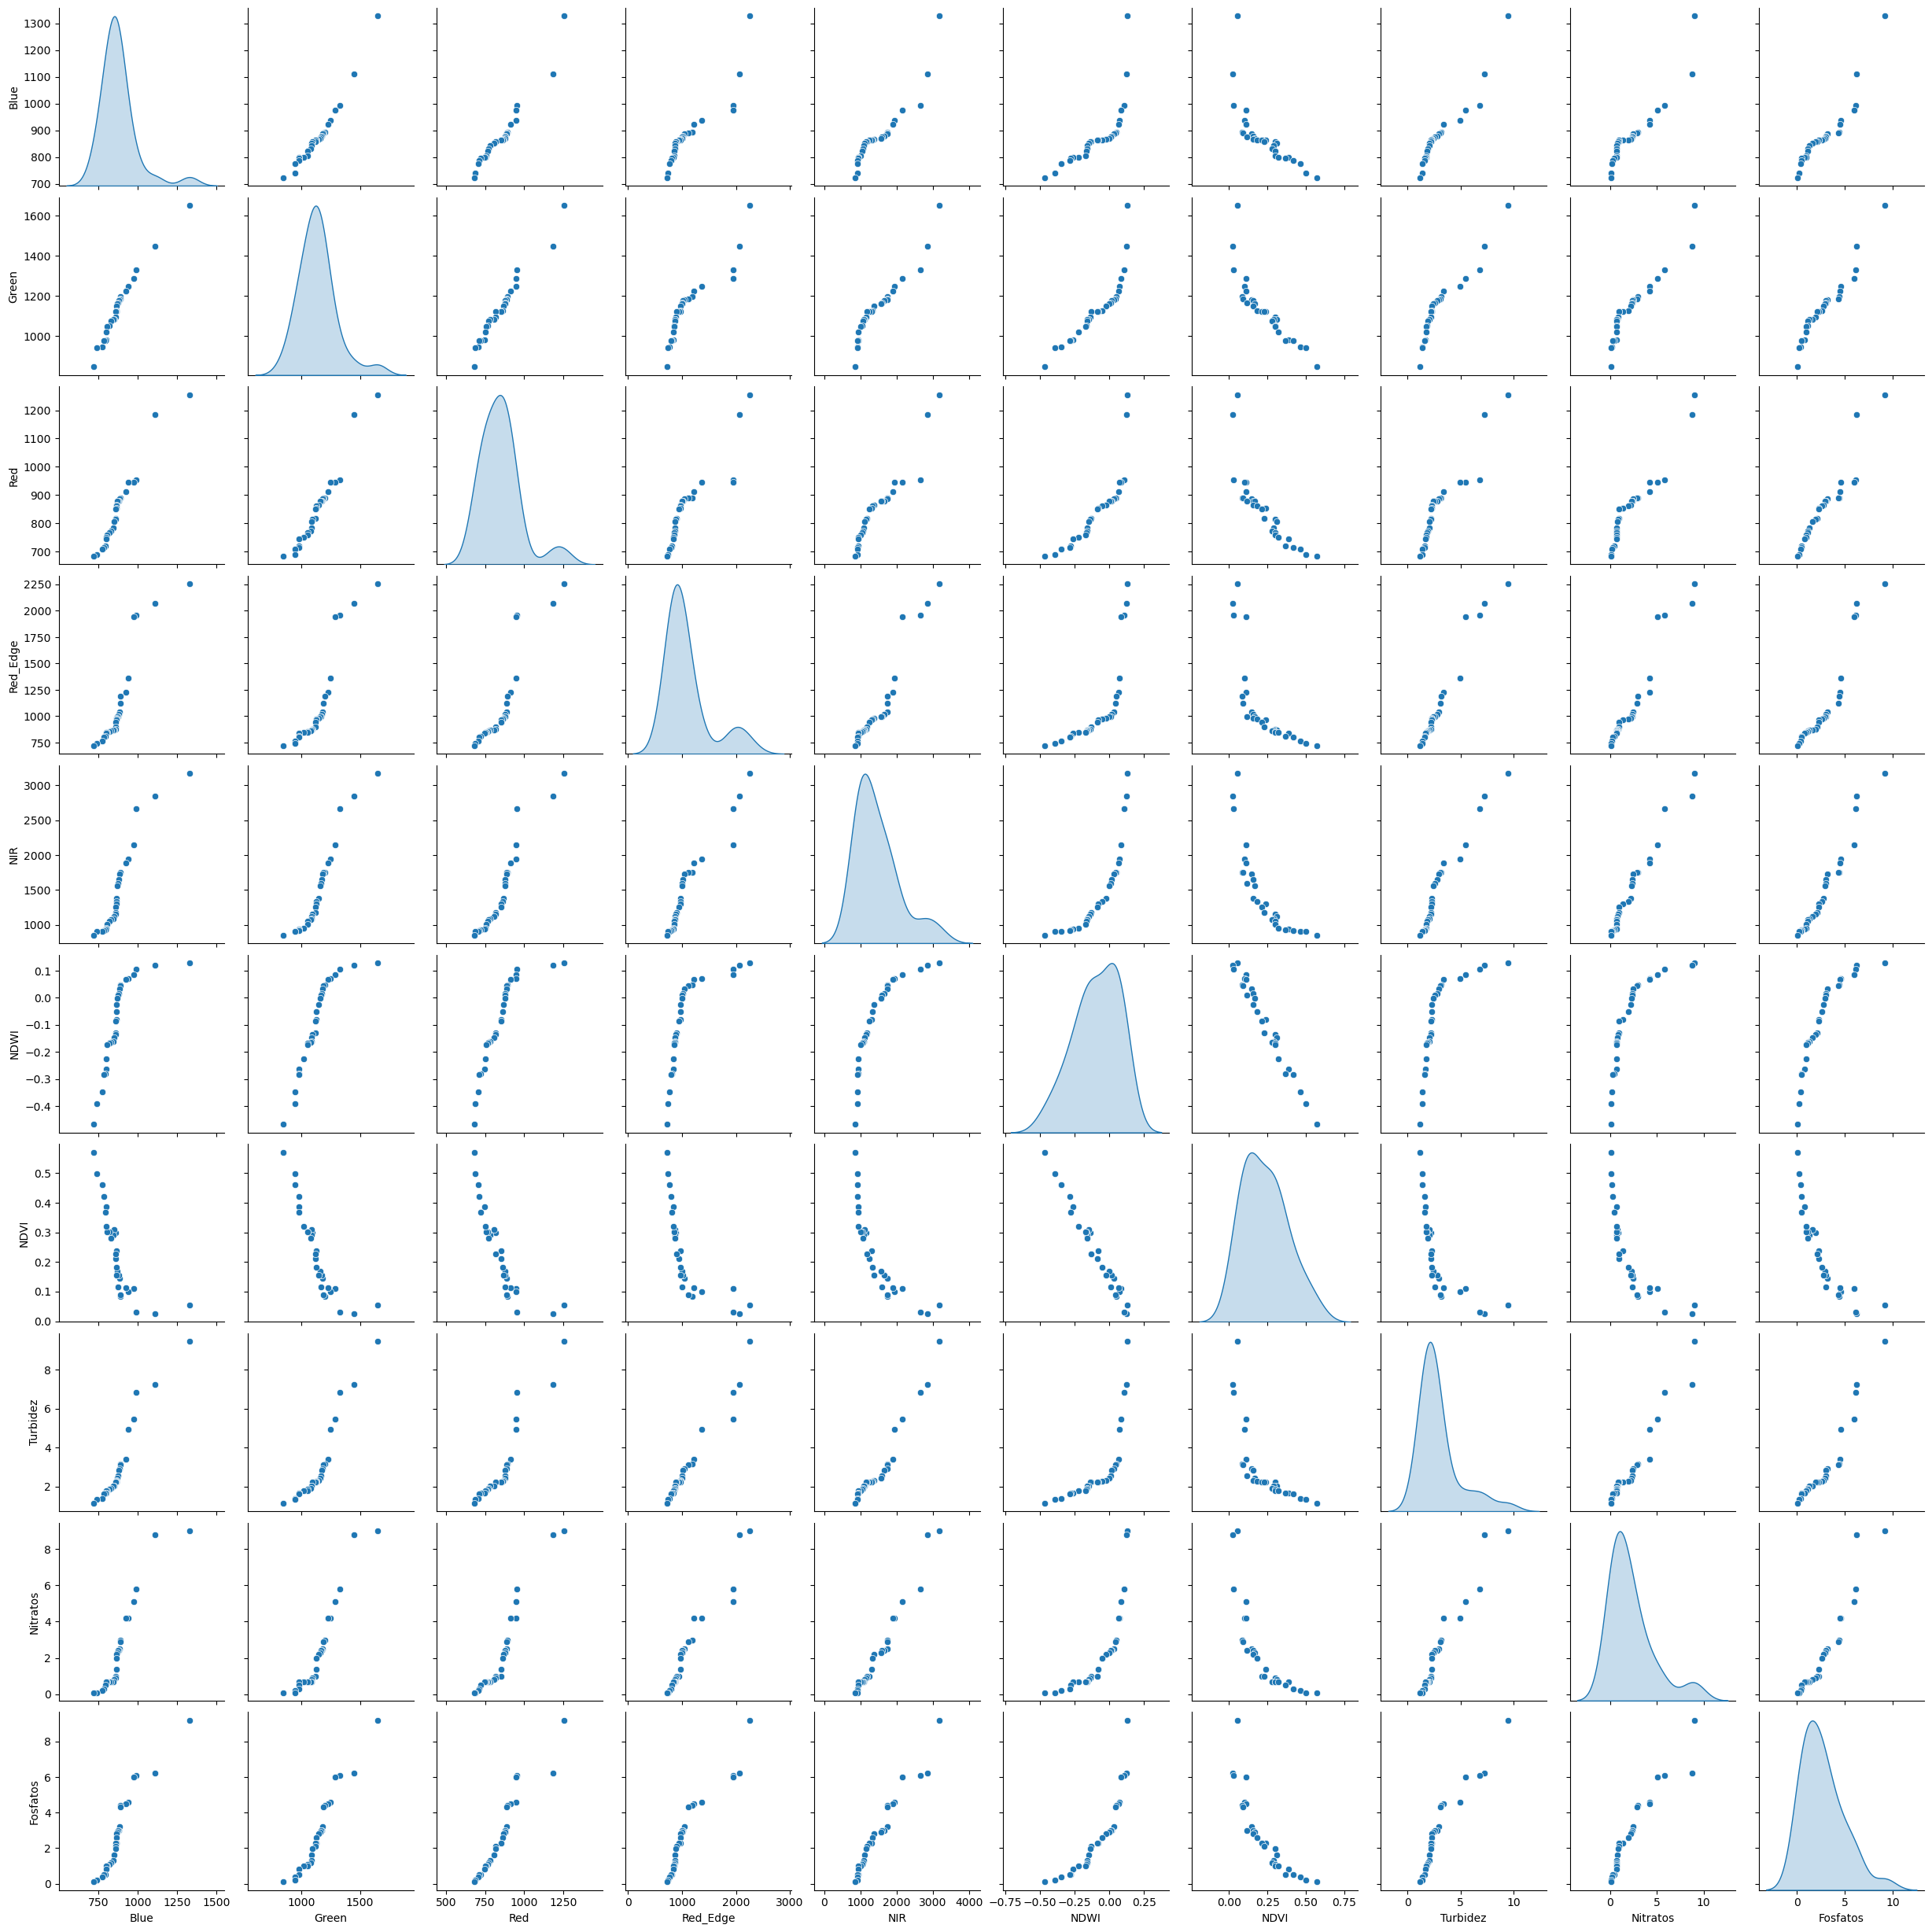

In [4]:
plt.figure(figsize=(25, 20))
train_num = gdf[["Blue","Green","Red","Red_Edge","NIR","NDWI","NDVI","Turbidez","Nitratos","Fosfatos"]]

sns.pairplot(train_num, diag_kind='kde')
plt.show()

## 2.1 Selección del parametro a analizar

In [5]:
# Define a variable to store the selected value
selected_value = None  

# Function to update the variable
def on_value_change(change):
    global selected_value
    selected_value = change['new']
    print(f"Selected Water Quality Parameter: {selected_value}")

# Create ToggleButtons widget
toggle_buttons = widgets.ToggleButtons(
    options=["Selecciona...",'Turbidez', 'Nitratos', 'Fosfatos'],
    description='Parámetro de Calidad de Agua:',
    disabled=False
)

# Attach event listener
toggle_buttons.observe(on_value_change, names='value')

# Display widget
display(toggle_buttons)


ToggleButtons(description='Parámetro de Calidad de Agua:', options=('Selecciona...', 'Turbidez', 'Nitratos', '…

Selected Water Quality Parameter: Fosfatos


# 3. Extraer Variables predictoras y variables respuesta para el modelo SVM 

In [6]:
X= gdf.drop(columns = ['ID','Turbidez','Nitratos','Fosfatos','geometry'])
y = gdf[selected_value]
X

,Blue,Green,Red,Red_Edge,NIR,NDWI,NDVI
0,1328.420,1651.760,1255.340,2253.550,3169.860,0.129543,0.055709
1,1110.980,1448.230,1184.630,2067.500,2842.020,0.120542,0.024954
2,992.203,1331.030,954.005,1954.350,2659.460,0.105161,0.029377
3,975.826,1288.430,945.384,1941.240,2149.080,0.084407,0.111475
4,938.151,1248.590,945.147,1362.800,1939.250,0.070404,0.100835
5,923.979,1225.220,911.826,1224.240,1883.890,0.066926,0.112049
6,892.135,1198.300,890.934,1192.530,1750.350,0.046654,0.082771
7,890.890,1184.290,889.172,1122.890,1747.110,0.044522,0.087771
8,886.775,1181.730,887.519,1039.150,1733.640,0.032495,0.145905
9,879.324,1176.040,878.396,1020.370,1655.390,0.015697,0.155319


## 3.1 Separar variables de entrenamiento y de validación del modelo

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

X_train

,Blue,Green,Red,Red_Edge,NIR,NDWI,NDVI
20,832.709,1076.660,772.519,864.120,1073.770,-0.163188,0.280685
26,787.102,978.496,713.638,799.342,922.972,-0.283849,0.419985
3,975.826,1288.430,945.384,1941.240,2149.080,0.084407,0.111475
24,798.784,980.198,744.497,836.444,944.598,-0.264341,0.386848
22,806.394,1049.710,758.185,849.182,1009.860,-0.173111,0.302037
23,800.247,1021.500,751.870,843.961,948.033,-0.223919,0.319374
4,938.151,1248.590,945.147,1362.800,1939.250,0.070404,0.100835
2,992.203,1331.030,954.005,1954.350,2659.460,0.105161,0.029377
25,797.330,979.440,719.901,809.272,935.138,-0.281533,0.369020
6,892.135,1198.300,890.934,1192.530,1750.350,0.046654,0.082771


# 4. Estandarizar los datos del modelo

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# y_train_scaled_turb = scaler_y.fit_transform(y_trainTurbidez.reshape(-1, 1)).ravel()

X_train_scaled

array([[-4.05369237e-01, -3.79558447e-01, -6.02334648e-01,
        -5.92551643e-01, -6.96097664e-01, -4.13316856e-01,
         3.30188246e-01],
       [-7.78036994e-01, -9.60521535e-01, -1.03515802e+00,
        -7.40918043e-01, -9.34039760e-01, -1.12101649e+00,
         1.25424504e+00],
       [ 7.64080441e-01,  8.73757973e-01,  6.68364084e-01,
         1.87446518e+00,  1.00061924e+00,  1.03887474e+00,
        -7.92278733e-01],
       [-6.82580052e-01, -9.50448605e-01, -8.08319202e-01,
        -6.55940270e-01, -8.99916391e-01, -1.00659837e+00,
         1.03442831e+00],
       [-6.20396580e-01, -5.39056382e-01, -7.07701239e-01,
        -6.26765377e-01, -7.96940377e-01, -4.71517131e-01,
         4.71828308e-01],
       [-6.70625464e-01, -7.06011362e-01, -7.54121639e-01,
        -6.38723465e-01, -8.94496352e-01, -7.69515680e-01,
         5.86834572e-01],
       [ 4.56227309e-01,  6.37973272e-01,  6.66621941e-01,
         5.49616316e-01,  6.69531361e-01,  9.56744495e-01,
        -8.6285995

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_30060\3467231309.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_coefficients.values, y=lasso_coefficients.index, palette="coolwarm")


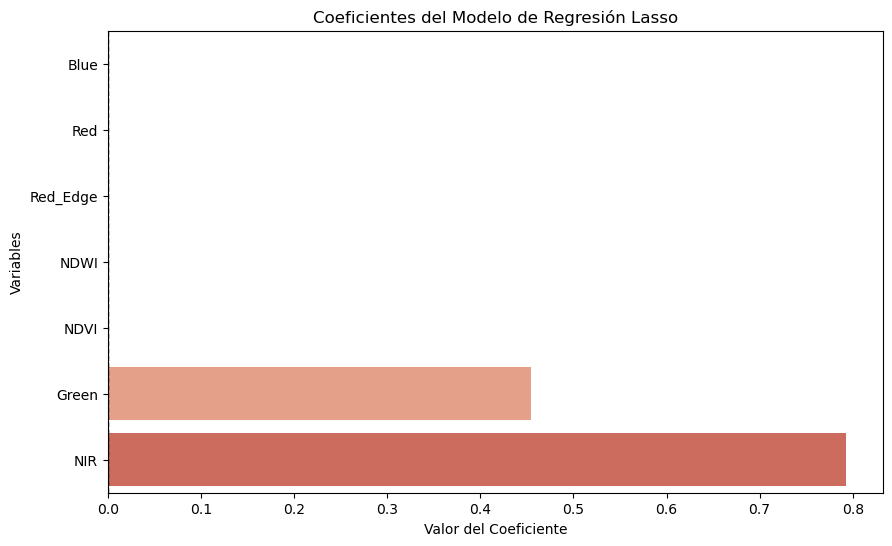

,Coeficiente
Blue,0.000000
Red,0.000000
Red_Edge,0.000000
NDWI,0.000000
NDVI,-0.000000
Green,0.454214
NIR,0.792564


In [9]:

# Normalización de los datos para Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de Regresión Lasso con alpha=1 (puede ajustarse)
lasso = Lasso(alpha=1)
lasso.fit(X_train_scaled, y_train)

# Obtener los coeficientes
lasso_coefficients = pd.Series(lasso.coef_, index=X_train.columns)

# Mostrar los coeficientes ordenados
lasso_coefficients = lasso_coefficients.sort_values()

# Visualización de los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x=lasso_coefficients.values, y=lasso_coefficients.index, palette="coolwarm")
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variables")
plt.title("Coeficientes del Modelo de Regresión Lasso")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.show()

# Mostrar la tabla con los coeficientes
import pandas as pd

lasso_coefficients_df = lasso_coefficients.to_frame(name="Coeficiente")
display(lasso_coefficients_df)  # Si usas Jupyter Notebook o Colab

# 5. Entrenar el modelos de aprendizaje computacional

In [10]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}
# Train SVR with GridSearchCV
svr = SVR()
svr_cv = GridSearchCV(svr, param_grid_svr, cv=5, n_jobs=-1)
svr_cv.fit(X_train, y_train)
# Extract best parameters
best_params_svr = svr_cv.best_params_
print("Best SVR Parameters:", best_params_svr)
# Define new optimized models with best parameters
optimized_svr = SVR(**best_params_svr)

# Train the optimized models
optimized_svr.fit(X_train, y_train)
optimized_svr


Best SVR Parameters: {'C': 0.1, 'epsilon': 1, 'kernel': 'linear'}


SVR(C=0.1, epsilon=1, kernel='linear')

In [11]:
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
}
# Train Gradient Boosting Regressor with GridSearchCV
gbr = GradientBoostingRegressor(random_state=13)
gbr_cv = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
gbr_cv.fit(X_train, y_train)
best_params_gbr = gbr_cv.best_params_
print("Best GBR Parameters:", best_params_gbr)
optimized_gbr = GradientBoostingRegressor(random_state=13, **best_params_gbr)
optimized_gbr.fit(X_train, y_train)
optimized_gbr

Best GBR Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=2,
                          random_state=13)

In [12]:
# Define parameter grids
param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}
# Train Random Forest Regressor with GridSearchCV
rfr = RandomForestRegressor(random_state=13)
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid_rfr, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
rfr_cv.fit(X_train, y_train)
best_params_rfr = rfr_cv.best_params_
print("Best RFR Parameters:", best_params_rfr)
optimized_rfr = RandomForestRegressor(random_state=13, **best_params_rfr,n_jobs=-1)
optimized_rfr.fit(X_train, y_train)
optimized_rfr

Best RFR Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=13)

# 5.1 Validación de los modelos

MAE Support Vector Regressor: 0.2928764993661787
RMSE Support Vector Regressor: 0.14946755230661393
R2: 0.6844652428844364
 MAE Random Forest: 0.16092000000000048
RMSE Support Vector Regressor: 0.04391052000000013
R2: 0.907302320475579
    Feature  Importance
6      NDVI    0.229729
4       NIR    0.150675
0      Blue    0.134480
3  Red_Edge    0.132050
1     Green    0.131303
2       Red    0.129819
5      NDWI    0.091946
MAE Gradient Boost Regression: 0.13202005063572755
RMSE Support Vector Regressor: 0.027976507913950732
R2: 0.9409399532317124
    Feature  Importance
6      NDVI    0.229729
4       NIR    0.150675
0      Blue    0.134480
3  Red_Edge    0.132050
1     Green    0.131303
2       Red    0.129819
5      NDWI    0.091946


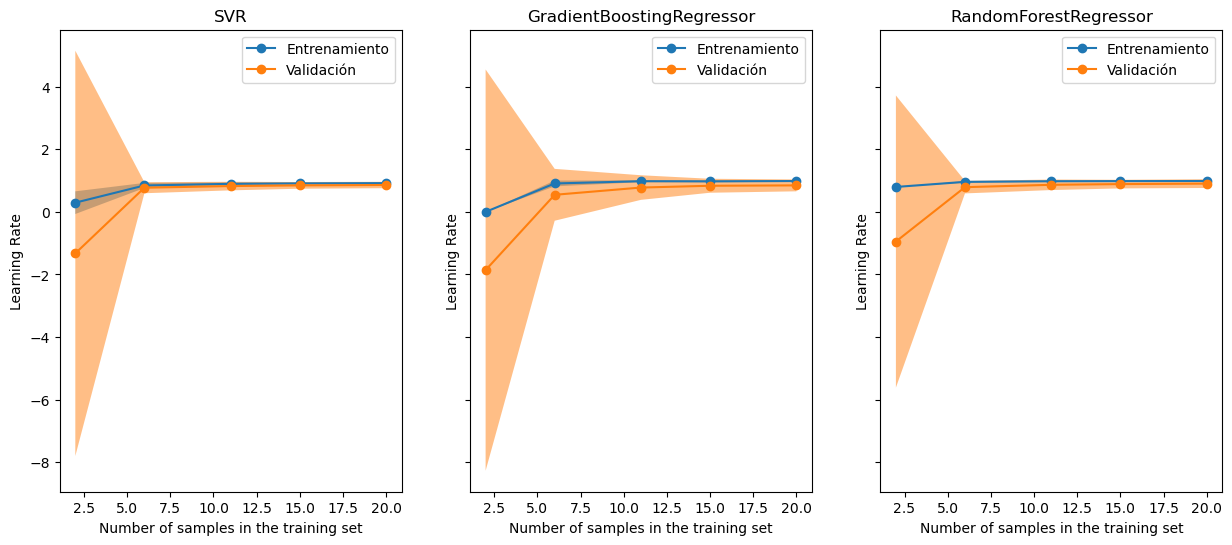

In [13]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Learning Rate",
}

for ax_idx, estimator in enumerate([optimized_svr,optimized_gbr, optimized_rfr]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Entrenamiento", "Validación"])
    ax[ax_idx].set_title(f"{estimator.__class__.__name__}")



y_pred_svr = optimized_svr.predict(X_test)
error_lin = mean_absolute_error(y_test,y_pred_svr)
r2 = r2_score(y_test,y_pred_svr)
rmse = mean_squared_error(y_test,y_pred_svr)
print("MAE Support Vector Regressor:", error_lin)
print("RMSE Support Vector Regressor:",  rmse)
print("R2:", r2)

# importance = optimized_svr.feature_importances_
# feature_importance = pd.DataFrame({
#     'Feature': ["NDWI","NDVI"],
#     'Importance': importance
# }).sort_values(by='Importance', ascending=False)

# print(feature_importance)


#########################################################################################
y_pred_rfr = optimized_rfr.predict(X_test)
error_lin = mean_absolute_error(y_test,y_pred_rfr)
rmse = mean_squared_error(y_test,y_pred_rfr)
r2 = r2_score(y_test,y_pred_rfr)
print(" MAE Random Forest:", error_lin)
print("RMSE Support Vector Regressor:",  rmse)
print("R2:", r2)

importance = optimized_rfr.feature_importances_
feature_importance = pd.DataFrame({
    'Feature':['Blue','Green','Red','Red_Edge','NIR','NDWI','NDVI'],
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

#############################################################################################3

y_pred_gbr = optimized_gbr.predict(X_test)
error_lin = mean_absolute_error(y_test,y_pred_gbr)
rmse = mean_squared_error(y_test,y_pred_gbr)
r2 = r2_score(y_test,y_pred_gbr)
print("MAE Gradient Boost Regression:", error_lin)
print("RMSE Support Vector Regressor:",  rmse)
print("R2:", r2)

importance = optimized_rfr.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': ['Blue','Green','Red','Red_Edge','NIR','NDWI','NDVI'],
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# 6. Cargar imagen multiespectral

In [14]:

# Cargar ambos indices espectrales NDWI y NDVI
img1 = rasterio.open(r"C:\Users\USUARIO\Desktop\TESIS\Ortoimagenes\Ubaque\Bandas\Band_1.tif")
img2 = rasterio.open(r"C:\Users\USUARIO\Desktop\TESIS\Ortoimagenes\Ubaque\Bandas\Band_2.tif")
img4 = rasterio.open(r"C:\Users\USUARIO\Desktop\TESIS\Ortoimagenes\Ubaque\Bandas\Band_4.tif")
img5 = rasterio.open(r"C:\Users\USUARIO\Desktop\TESIS\Ortoimagenes\Ubaque\Bandas\Band_5.tif") 
img6 = rasterio.open(r"C:\Users\USUARIO\Desktop\TESIS\Ortoimagenes\Ubaque\Bandas\Band_6.tif")  
img7 = rasterio.open(r"C:\Users\USUARIO\Desktop\TESIS\Ortoimagenes\Ubaque\NDWI_UBAQUE.tif")  
img8 =  rasterio.open(r"C:\Users\USUARIO\Desktop\TESIS\Ortoimagenes\Ubaque\NDVI_UBAQUE.tif")
data1 = img1.read()  # Shape: (bands, height, width)
data2 = img2.read()  # Shape: (bands, height, width)
data4 = img4.read()
data5 = img5.read()
data6 = img6.read()
data7 = img7.read()
data8 = img8.read()
profile = img1.profile




# 6.1 Configurar imagen como un vector 2D para representar cada valor de pixel

In [15]:
# Unir ambas imágenes en una sola matriz para predecir los valores con el modelo de regresión
combined_data = np.vstack((data1, data2,data4,data5,data6,data7,data8))  # Shape: (bands1 + bands2, height, width)
height, width = combined_data.shape[1:]
image_reshaped = combined_data.reshape(combined_data.shape[0], -1).T  # Shape: (pixels, bands)

# 6.2 Estandarizar la imagen y predecir la variable de estudio

In [16]:
image_scaled = scaler.transform(image_reshaped)
predicted_image_svr = optimized_svr.predict(image_reshaped)
predicted_image_rfr = optimized_rfr.predict(image_reshaped)
predicted_scaled_gbr = optimized_gbr.predict(image_reshaped)

c:\Users\USUARIO\AppData\Local\ESRI\conda\envs\Diego\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USUARIO\AppData\Local\ESRI\conda\envs\Diego\Lib\site-packages\sklearn\preprocessing\_data.py:1025: RuntimeWarning: overflow encountered in divide
  X /= self.scale_
c:\Users\USUARIO\AppData\Local\ESRI\conda\envs\Diego\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\USUARIO\AppData\Local\ESRI\conda\envs\Diego\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\USUARIO\AppData\Local\ESRI\conda\envs\Diego\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  wa

# 7. Reconstrucción de la imagen original 

In [17]:
image_svr = predicted_image_svr.reshape(height, width)
image_rfr = predicted_image_rfr.reshape(height, width)
image_gbr = predicted_scaled_gbr.reshape(height, width)

# 8. Guardar Imagen Generada

In [18]:
output_path_SVR = r'C:\Users\USUARIO\Desktop\TESIS\Script_Modelos_IA\Imagenes_Generadas\UBAQUE\{0}\{0}_SVR_P.tif'.format(selected_value)
output_path_RFR = r'C:\Users\USUARIO\Desktop\TESIS\Script_Modelos_IA\Imagenes_Generadas\UBAQUE\{0}\{0}_RFR_P.tif'.format(selected_value)
output_path_GBR = r'C:\Users\USUARIO\Desktop\TESIS\Script_Modelos_IA\Imagenes_Generadas\UBAQUE\{0}\{0}_GBR_P.tif'.format(selected_value)

profile.update(dtype=rasterio.float32, count=1)
with rasterio.open(output_path_SVR, 'w', **profile) as dst:
    dst.write(image_svr.astype(rasterio.float32), 1)
print(f"Predicted image saved to {output_path_SVR}")
with rasterio.open(output_path_RFR, 'w', **profile) as dst:
    dst.write(image_rfr.astype(rasterio.float32), 1)
print(f"Predicted image saved to {output_path_RFR}")
with rasterio.open(output_path_GBR, 'w', **profile) as dst:
    dst.write(image_gbr.astype(rasterio.float32), 1)
print(f"Predicted image saved to {output_path_GBR}")

Predicted image saved to C:\Users\USUARIO\Desktop\TESIS\Script_Modelos_IA\Imagenes_Generadas\UBAQUE\Fosfatos\Fosfatos_SVR_P.tif
Predicted image saved to C:\Users\USUARIO\Desktop\TESIS\Script_Modelos_IA\Imagenes_Generadas\UBAQUE\Fosfatos\Fosfatos_RFR_P.tif
Predicted image saved to C:\Users\USUARIO\Desktop\TESIS\Script_Modelos_IA\Imagenes_Generadas\UBAQUE\Fosfatos\Fosfatos_GBR_P.tif
